In [ ]:
# Importing necessary libraries for data processing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Displaying the first few rows of the cleaned dataset to check the changes
df = pd.read_csv('walk_data_meta.csv')
df.head()

,sub_id,datestring,filename,speed_w,age,Height,Weight,Gender,DominantLeg,InjDefn,...,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
0,100433,2010-10-05 13:22,20101005T132240.json,1.113930,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,NaN,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN
1,100434,2010-11-17 13:22,20101117T132240.json,1.107742,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,NaN,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
2,100537,2012-07-03 10:25,20120703T102550.json,1.121041,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,NaN,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
3,100560,2012-07-17 10:37,20120717T103748.json,1.322763,33,179.3,83.0,Female,Right,No injury,...,NaN,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
4,101481,2012-07-17 10:50,20120717T105021.json,1.120394,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Displaying the first few rows of the cleaned dataset to check the changes
df['can_play_next_match'] = df['InjDefn'].fillna('No injury').apply(lambda x: 1 if "no injury" in x.lower() else 0)

print("Target value counts:")
print(df['can_play_next_match'].value_counts())
df.head()

Target value counts:
can_play_next_match
0    1092
1     996
Name: count, dtype: int64


,sub_id,datestring,filename,speed_w,age,Height,Weight,Gender,DominantLeg,InjDefn,...,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces,can_play_next_match
0,100433,2010-10-05 13:22,20101005T132240.json,1.113930,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN,0
1,100434,2010-11-17 13:22,20101117T132240.json,1.107742,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,0
2,100537,2012-07-03 10:25,20120703T102550.json,1.121041,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,0
3,100560,2012-07-17 10:37,20120717T103748.json,1.322763,33,179.3,83.0,Female,Right,No injury,...,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,1
4,101481,2012-07-17 10:50,20120717T105021.json,1.120394,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
cols_to_drop = [
    'sub_id', 'datestring', 'filename', 'InjDefn', 'InjJoint', 'InjSide', 'SpecInjury',
    'InjDuration', 'InjJoint2', 'InjSide2', 'SpecInjury2', 'Activities',
    'RaceDistance', 'RaceTimeHrs', 'RaceTimeMins', 'RaceTimeSecs', 'YrPR', 'NumRaces',
]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

df.drop_duplicates(inplace=True)

print("Data shape after dropping unwanted columns and duplicates:", df.shape)
df.head()

Data shape after dropping unwanted columns and duplicates: (2088, 9)


,speed_w,age,Height,Weight,Gender,DominantLeg,Level,YrsRunning,can_play_next_match
0,1.113930,53,NaN,NaN,Unknown,NaN,Recreational,13.0,0
1,1.107742,51,NaN,NaN,Female,NaN,Recreational,20.0,0
2,1.121041,255,173.1,67.6,Female,Right,Recreational,2.0,0
3,1.322763,33,179.3,83.0,Female,Right,Recreational,NaN,1
4,1.120394,32,176.3,58.6,Female,NaN,NaN,NaN,1


In [ ]:
# Displaying the first few rows of the cleaned dataset to check the changes
numeric_cols = ['speed_w', 'age', 'Height', 'Weight', 'YrsRunning']
categorical_cols = ['Gender', 'DominantLeg', 'Level']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values per column after imputation:")
print(df.isnull().sum())
df.head()

Missing values per column after imputation:
speed_w                0
age                    0
Height                 0
Weight                 0
Gender                 0
DominantLeg            0
Level                  0
YrsRunning             0
can_play_next_match    0
dtype: int64


,speed_w,age,Height,Weight,Gender,DominantLeg,Level,YrsRunning,can_play_next_match
0,1.113930,53,171.0,70.0,Unknown,Right,Recreational,13.0,0
1,1.107742,51,171.0,70.0,Female,Right,Recreational,20.0,0
2,1.121041,255,173.1,67.6,Female,Right,Recreational,2.0,0
3,1.322763,33,179.3,83.0,Female,Right,Recreational,8.0,1
4,1.120394,32,176.3,58.6,Female,Right,Recreational,8.0,1


In [ ]:
# Displaying the first few rows of the cleaned dataset to check the changes
numeric_cols = ['speed_w', 'age', 'Height', 'Weight', 'YrsRunning']
categorical_cols = ['Gender', 'DominantLeg', 'Level']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values per column after imputation:")
print(df.isnull().sum())
df.head()

Missing values per column after imputation:
speed_w                0
age                    0
Height                 0
Weight                 0
Gender                 0
DominantLeg            0
Level                  0
YrsRunning             0
can_play_next_match    0
dtype: int64


,speed_w,age,Height,Weight,Gender,DominantLeg,Level,YrsRunning,can_play_next_match
0,1.113930,53,171.0,70.0,Unknown,Right,Recreational,13.0,0
1,1.107742,51,171.0,70.0,Female,Right,Recreational,20.0,0
2,1.121041,255,173.1,67.6,Female,Right,Recreational,2.0,0
3,1.322763,33,179.3,83.0,Female,Right,Recreational,8.0,1
4,1.120394,32,176.3,58.6,Female,Right,Recreational,8.0,1


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,Gender_Unknown,DominantLeg_Left,DominantLeg_Right,Level_Recreational
0,1.113930,53,171.0,70.0,13.0,0,False,True,False,True,True
1,1.107742,51,171.0,70.0,20.0,0,False,False,False,True,True
2,1.121041,255,173.1,67.6,2.0,0,False,False,False,True,True
3,1.322763,33,179.3,83.0,8.0,1,False,False,False,True,True
4,1.120394,32,176.3,58.6,8.0,1,False,False,False,True,True


In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,Gender_Unknown,DominantLeg_Left,DominantLeg_Right,Level_Recreational
0,-0.486621,0.667982,0.044469,-0.068349,-0.143032,0,False,True,False,True,True
1,-0.521177,0.529888,0.044469,-0.068349,-0.099297,0,False,False,False,True,True
2,-0.446912,14.615443,0.095884,-0.210121,-0.211759,0,False,False,False,True,True
3,0.679556,-0.712955,0.247682,0.699583,-0.174272,1,False,False,False,True,True
4,-0.450525,-0.782002,0.174231,-0.741766,-0.174272,1,False,False,False,True,True


In [ ]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
cols_to_drop = [
 'Gender_Unknown','DominantLeg_Left'
]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,DominantLeg_Right,Level_Recreational
0,-0.486621,0.667982,0.044469,-0.068349,-0.143032,0,False,True,True
1,-0.521177,0.529888,0.044469,-0.068349,-0.099297,0,False,True,True
2,-0.446912,14.615443,0.095884,-0.210121,-0.211759,0,False,True,True
3,0.679556,-0.712955,0.247682,0.699583,-0.174272,1,False,True,True
4,-0.450525,-0.782002,0.174231,-0.741766,-0.174272,1,False,True,True


In [ ]:
# Printing the shape of the dataset after cleaning




print(df['can_play_next_match'].value_counts())




can_play_next_match
0    1092
1     996
Name: count, dtype: int64


In [ ]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
X = df.drop('can_play_next_match', axis=1)
y = df['can_play_next_match']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)

print("Test set shape:", X_test.shape)

Training set shape: (1670, 8)
Test set shape: (418, 8)


In [ ]:
# Printing the shape of the dataset after cleaning
print("Original training target distribution:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter applying SMOTE, training target distribution:")
print(pd.Series(y_train_res).value_counts())

Original training target distribution:
can_play_next_match
0    873
1    797
Name: count, dtype: int64

After applying SMOTE, training target distribution:
can_play_next_match
1    873
0    873
Name: count, dtype: int64


In [ ]:
# prompt: i want to download the cleaned and ready dataset  separately

from google.colab import files
df.to_csv('cleaned_dataset.csv', encoding = 'utf-8-sig')
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load dataset
file_path = "cleaned_dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=["can_play_next_match"])
y = df["can_play_next_match"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model with hyperparameter tuning
rf_model = RandomForestClassifier(
    n_estimators=200,  # Increase trees for better generalization
    max_depth=8,  # Limit tree depth to prevent overfitting
    min_samples_split=5,  # Require at least 5 samples to split a node
    min_samples_leaf=2,  # Require at least 2 samples per leaf node
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Generate classification reports
train_report = classification_report(y_train, rf_model.predict(X_train))
test_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)
print("ROC AUC Score:", roc_auc)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       858
           1       0.96      0.87      0.91       812

    accuracy                           0.92      1670
   macro avg       0.93      0.92      0.92      1670
weighted avg       0.92      0.92      0.92      1670

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       234
           1       0.87      0.83      0.85       184

    accuracy                           0.87       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.87      0.87      0.87       418

ROC AUC Score: 0.9072370865849125


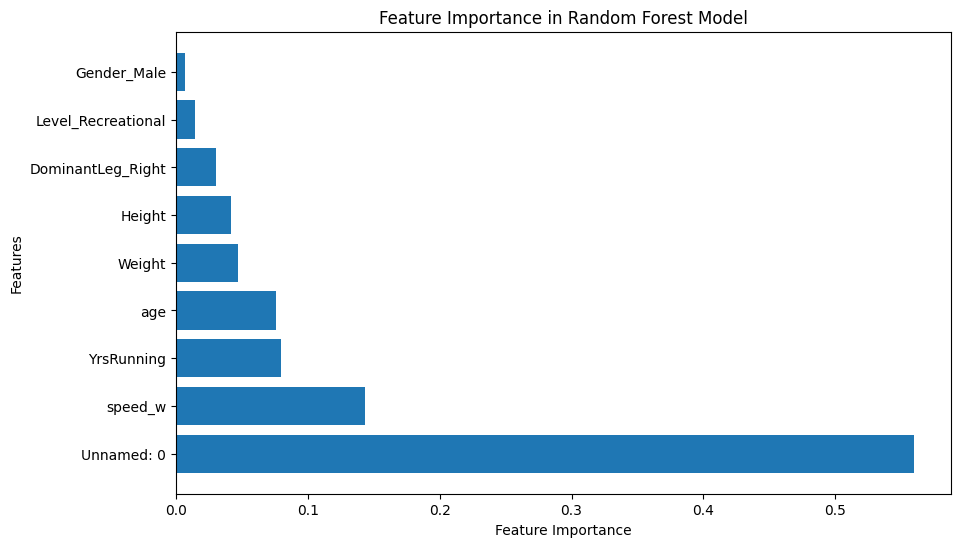

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance Graph
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [ ]:
# Save the model to a file
with open('hashan.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

files.download('hashan.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>